# Load all notebooks with Functions

In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Finalized

In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Tables

# Configure Parameters

In [0]:
# PARAMETERS

ATTRIBUUT = "ndATasteVariety" # Selecteer Attribuut om te TRAINEN                                              ndTypeOfGrain       ndAnimalSpecies
numerieke_features = ['']#['SUGAR_was_missing','SUGAR_UOM_class','SUGAR']#['FIBER','FIBER_was_missing','Fiber_UOM_class','PROTEINE'] # Deze numerieke features nemen we mee in het trainingsprocess, leeg is ook mogelijk --> []

SAVE_MODEL = True #True # Wil je een oud model overschrijven met een nieuwe?
EPOCHS = 100

Classes_threshold = 11
Overig_threshold = 200 # Class beneden deze threshold, zal worden toegevoegd aan class: 'overig'

Upsample_size_TRAIN = 4000
Upsample_size_VAL = 1000
Upsample_size_TEST = 1000

balance_threshold_single_label = 500
upsample_single_label = 5000

downsampeling_needed = False

# Indien andere numeriek features dan -> nutrienten is gewenst, zie dan:
# 'Functions_Rebuild -> Tables' voeg hier de extra Table dan toe
save_numerical_features_(SAVE_MODEL,ATTRIBUUT, numerieke_features)
if numerieke_features == ['']:
    numerieke_features = []

/databricks/spark/python/pyspark/sql/dataframe.py:146: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
 warnings.warn(
(49352, 20)
Shape van DF (row, columns) (35181, 8)

# Training Process loop

Downsamepling gebruiken als je een attribuut hebt die hele ongebalanceerde classes hebt (bijv. 5000 True, 5000 False en 20000 Empty), alles wordt dan even groot als de kleinste class (equal_classes_downsample). Als dit niet nodig is dan gebruik je imbalance_check_single_label. Zet boolean downsampeling_need op True in cmd 5 indien gewenst.

Amount of rows: (35905, 'Amount of columns: ', 54)
ATTRIBUUT: ndATasteVariety
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df_unique[str(unique_items[index])] = df_unique[attribuut].str.contains(pat = str(unique_items[index]))
<command-3325852567044210>:26: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.c

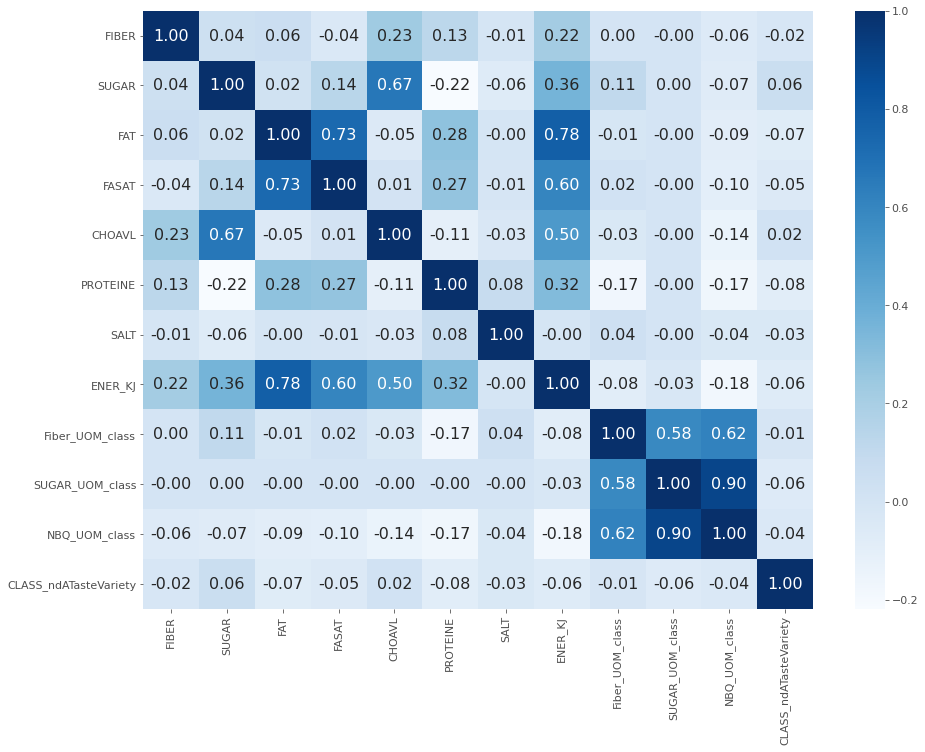

Vocab size: 39801.0
(14016, 6) (4672, 6) (4672, 6)
(14016, 21) (4672, 21) (4672, 21)

In [0]:
# Formateer
nd_controle = koppel_ndAttributen_new_products(NASA_CONTROLE)
df_geformateerd, multi_label_flag,classes_available = create_overige_class(nd_controle, ATTRIBUUT,Classes_threshold, Overig_threshold)

DF_merged = koppel_preprocessed_text(df_geformateerd, DF_NLP_spark)
DF_merged = fix_empty_fields(DF_merged, ATTRIBUUT)
DF_merged = Correlation_matrix(DF_merged, ATTRIBUUT, show_nan_plot=False, show_correlation_matrix=True)

#Prepare for trainimg
vocab_size = get_vocabulary_size(DF_merged)

if multi_label_flag == True:
    X_train, X_val, X_test, y_train, y_val, y_test, targets = total_split(DF_merged, numerieke_features, ATTRIBUUT)
else:
    if downsampeling_needed == True:
        DF_merged = equal_classes_downsample(classes_available, DF_merged)
    else:
        DF_merged = imbalance_check_single_label(classes_available, DF_merged, upsample_single_label)
    ytrain, yval, ytest, Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text = single_prep(numerieke_features, DF_merged, ATTRIBUUT)

In [0]:
if multi_label_flag == True:
    classes = DF_merged['overig'].value_counts().index.tolist() # haal [0,1] en [1,0] als class eruit
    X_train, y_train = balance_multi_label(targets, y_train, X_train, classes, Upsample_size_TRAIN, balance_set = "TRAIN-SET") # Balance each sub-class TRAINING
    X_val, y_val = balance_multi_label(targets, y_val, X_val, classes, Upsample_size_VAL, balance_set = "VALIDATION-SET") # Balance each sub-class VALIDATION
    X_test, y_test = balance_multi_label(targets, y_test, X_test, classes, Upsample_size_TEST, balance_set = "TEST-SET") # Balance each sub-class TEST

    train_accuracies, val_accuracies, train_loss, val_loss,class_names, model = TRAINING_multi_label(X_train, X_val, X_test, y_train, y_val, y_test, numerieke_features, vocab_size, ATTRIBUUT, SAVE_MODEL) # Start training the model --> Multi label
else:
    model, model_history = TRAINING_single_label(Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text, vocab_size, EPOCHS, SAVE_MODEL)


----------- BALANCING TRAIN-SET -----------

Samples available Aardbei 195 
Searching for: [0, 1]
Shape before upsampling minority class 14016 14016
Add Extra samples Y_train | X_Train 3805 3805
New shape 17821 17821

Samples available Appel 671 
Searching for: [0, 1]
Shape before upsampling minority class 17821 17821
Add Extra samples Y_train | X_Train 3329 3329
New shape 21150 21150

Samples available Chocolade 173 
Searching for: [0, 1]
Shape before upsampling minority class 21150 21150
Add Extra samples Y_train | X_Train 3827 3827
New shape 24977 24977

Samples available Citroen 554 
Searching for: [0, 1]
Shape before upsampling minority class 24977 24977
Add Extra samples Y_train | X_Train 3446 3446
New shape 28423 28423

Samples available Cola 1702 
Searching for: [0, 1]
Shape before upsampling minority class 28423 28423
Add Extra samples Y_train | X_Train 2298 2298
New shape 30721 30721

Samples available EMPTY 7901 
Searching for: [0, 1]

Samples available Framboos 755 
Searching for: [0, 1]
Shape before upsampling minority class 30721 30721
Add Extra samples Y_train | X_Train 3245 3245
New shape 33966 33966

Samples available Hazelnoot 153 
Searching for: [0, 1]
Shape before upsampling minority class 33966 33966
Add Extra samples Y_train | X_Train 3847 3847
New shape 37813 37813

Samples available Kaas 723 
Searching for: [0, 1]
Shape before upsampling minority class 37813 37813
Add Extra samples Y_train | X_Train 3277 3277
New shape 41090 41090

Samples available Karamel 813 
Searching for: [0, 1]
Shape before upsampling minority class 41090 41090
Add Extra samples Y_train | X_Train 3187 3187
New shape 44277 44277

Samples available Koffie 470 
Searching for: [0, 1]
Shape before upsampling minority class 44277 44277
Add Extra samples Y_train | X_Train 3530 3530
New shape 47807 47807

Samples available Melkchocolade 2311 
Searching for: [0, 1]
Shape before upsampling minority class 47807 47807
Add Extra samples Y_train | X_Train 1689 1689
New shape 49496 49496

Samples available Naturel 243 
Searching for: [0, 1]
Shape before upsampling minority class 49496 49496
Add Extra samples Y_train | X_Train 3757 3757
New shape 53253 53253

Samples available Paprika 257 
Searching for: [0, 1]
Shape before upsampling minority class 53253 53253
Add Extra samples Y_train | X_Train 3743 3743
New shape 56996 56996

Samples available Pure chocolade 842 
Searching for: [0, 1]
Shape before upsampling minority class 56996 56996
Add Extra samples Y_train | X_Train 3158 3158
New shape 60154 60154

Samples available Sinaasappel 4412 
Searching for: [0, 1]

Samples available Soja 306 
Searching for: [0, 1]
Shape before upsampling minority class 60154 60154
Add Extra samples Y_train | X_Train 3694 3694
New shape 63848 63848

Samples available Tomaat 911 
Searching for: [0, 1]
Shape before upsampling minority class 63848 63848
Add Extra samples Y_train | X_Train 3089 3089
New shape 66937 66937

Samples available Vanille 789 
Searching for: [0, 1]
Shape before upsampling minority class 66937 66937
Add Extra samples Y_train | X_Train 3211 3211
New shape 70148 70148

Samples available Yoghurt 2673 
Searching for: [0, 1]
Shape before upsampling minority class 70148 70148
Add Extra samples Y_train | X_Train 1327 1327
New shape 71475 71475

Samples available overig 27916 
Searching for: [0, 1]

----------- BALANCING VALIDATION-SET -----------

Samples available Aardbei 62 
Searching for: [0, 1]
Shape before upsampling minority class 4672 4672
Add Extra samples Y_train | X_Train 938 938
New shape 5610 5610

Samples available Appel 203 
Searching for: [0, 1]
Shape before upsampling minority class 5610 5610
Add Extra samples Y_train | X_Train 797 797
New shape 6407 6407

Samples available Chocolade 42 
Searching for: [0, 1]
Shape before upsampling minority class 6407 6407
Add Extra samples Y_train | X_Train 958 958
New shape 7365 7365

Samples available Citroen 224 
Searching for: [0, 1]
Shape before upsampling minority class 7365 7365
Add Extra sampl

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Aardbei.h5,model_Aardbei.h5,1194968,1654860225000


Appel
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_22"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_46 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_22 (Embedding) (None, 301, 4) 159204 ['input_46[0][0]'] 
 
 flatten_22 (Flatten) (None, 1204) 0 ['embedding_22[0][0]'] 
 
 input_45 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_67 (Dropout) (None, 1204) 0 ['flatten_22[0][0]'] 
 
 dropout_66 (Dropout) (None, 0) 0 ['input_45[0][0]'] 
 
 concatenate_22 (Concatenate) (None, 1204) 0 ['dropout_67[0][0]', 
 'dropout_66[0][0]'] 
 
 dense_88 (Dense) (None, 100) 120500 ['concatenate_22[0][0]'] 
 
 dense_89 (Dense) (None, 50) 5050 ['dense_88[0][0]'] 
 
 dense_90 (Dense) (None, 100) 5100 ['dense_89[0][0]'] 
 
 dropout_68 (Dropout) (None, 100) 0 ['dense_90[0][0]'] 
 
 dense_91 (Dense) (None, 2) 202 ['dropout_68[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 10s - loss: 0.3349 - accuracy: 0.8886 - val_loss: 0.3542 - val_accuracy: 0.8712 - 10s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1404 - accuracy: 0.9574 - val_loss: 0.0938 - val_accuracy: 0.9634 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0440 - accuracy: 0.9882 - val_loss: 0.0739 - val_accuracy: 0.9691 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0275 - accuracy: 0.9927 - val_loss: 0.0488 - val_accuracy: 0.9652 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0198 - accuracy: 0.9947 - val_loss: 0.0456 - val_accuracy: 0.9708 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.0441 - val_accuracy: 0.9756 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0124 - accuracy: 0.9967 - val_loss: 0.0482 - val_accuracy: 0.9784 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0612 - val_accuracy: 0.9780 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.0448 - val_accuracy: 0.9788 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0499 - val_accuracy: 0.9788 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0496 - val_accuracy: 0.9788 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0508 - val_accuracy: 0.9785 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0484 - val_accuracy: 0.9787 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0529 - val_accuracy: 0.9789 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0448 - val_accuracy: 0.9789 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0391 - val_accuracy: 0.9791 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0516 - val_accuracy: 0.9785 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0616 - val_accuracy: 0.9787 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0493 - val_accuracy: 0.9787 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0590 - val_accuracy: 0.9780 - 9s/epoch - 4

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Appel.h5,model_Appel.h5,1194968,1654860494000


Chocolade
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_23"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_48 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_23 (Embedding) (None, 301, 4) 159204 ['input_48[0][0]'] 
 
 flatten_23 (Flatten) (None, 1204) 0 ['embedding_23[0][0]'] 
 
 input_47 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_70 (Dropout) (None, 1204) 0 ['flatten_23[0][0]'] 
 
 dropout_69 (Dropout) (None, 0) 0 ['input_47[0][0]'] 
 
 concatenate_23 (Concatenate) (None, 1204) 0 ['dropout_70[0][0]', 
 'dropout_69[0][0]'] 
 
 dense_92 (Dense) (None, 100) 120500 ['concatenate_23[0][0]'] 
 
 dense_93 (Dense) (None, 50) 5050 ['dense_92[0][0]'] 
 
 dense_94 (Dense) (None, 100) 5100 ['dense_93[0][0]'] 
 
 dropout_71 (Dropout) (None, 100) 0 ['dense_94[0][0]'] 
 
 dense_95 (Dense) (None, 2) 202 ['dropout_71[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2285 - accuracy: 0.9436 - val_loss: 0.2039 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2025 - accuracy: 0.9440 - val_loss: 0.1985 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1837 - accuracy: 0.9455 - val_loss: 0.1868 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.1409 - accuracy: 0.9557 - val_loss: 0.1497 - val_accuracy: 0.9486 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0788 - accuracy: 0.9730 - val_loss: 0.1322 - val_accuracy: 0.9549 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.1466 - val_accuracy: 0.9395 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.1410 - val_accuracy: 0.9445 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.1639 - val_accuracy: 0.9471 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.1645 - val_accuracy: 0.9687 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.1788 - val_accuracy: 0.9441 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.1992 - val_accuracy: 0.9638 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.1961 - val_accuracy: 0.9652 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.2055 - val_accuracy: 0.9468 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.2140 - val_accuracy: 0.9428 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.2115 - val_accuracy: 0.9446 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.2244 - val_accuracy: 0.9467 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2323 - val_accuracy: 0.9643 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.2359 - val_accuracy: 0.9647 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.2266 - val_accuracy: 0.9492 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.2500 - val_accuracy: 0.9472 - 9s/epoch -

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Chocolade.h5,model_Chocolade.h5,1194968,1654860762000


Citroen
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_24"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_50 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_24 (Embedding) (None, 301, 4) 159204 ['input_50[0][0]'] 
 
 flatten_24 (Flatten) (None, 1204) 0 ['embedding_24[0][0]'] 
 
 input_49 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_73 (Dropout) (None, 1204) 0 ['flatten_24[0][0]'] 
 
 dropout_72 (Dropout) (None, 0) 0 ['input_49[0][0]'] 
 
 concatenate_24 (Concatenate) (None, 1204) 0 ['dropout_73[0][0]', 
 'dropout_72[0][0]'] 
 
 dense_96 (Dense) (None, 100) 120500 ['concatenate_24[0][0]'] 
 
 dense_97 (Dense) (None, 50) 5050 ['dense_96[0][0]'] 
 
 dense_98 (Dense) (None, 100) 5100 ['dense_97[0][0]'] 
 
 dropout_74 (Dropout) (None, 100) 0 ['dense_98[0][0]'] 
 
 dense_99 (Dense) (None, 2) 202 ['dropout_74[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 10s - loss: 0.2629 - accuracy: 0.9188 - val_loss: 0.2552 - val_accuracy: 0.9187 - 10s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2047 - accuracy: 0.9477 - val_loss: 0.2601 - val_accuracy: 0.9187 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1140 - accuracy: 0.9675 - val_loss: 0.2354 - val_accuracy: 0.9245 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0494 - accuracy: 0.9871 - val_loss: 0.2182 - val_accuracy: 0.9471 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.2348 - val_accuracy: 0.9565 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0200 - accuracy: 0.9945 - val_loss: 0.2253 - val_accuracy: 0.9568 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0146 - accuracy: 0.9961 - val_loss: 0.2506 - val_accuracy: 0.9408 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.2363 - val_accuracy: 0.9402 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.2611 - val_accuracy: 0.9421 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.2411 - val_accuracy: 0.9402 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.2736 - val_accuracy: 0.9423 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.2831 - val_accuracy: 0.9423 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.2655 - val_accuracy: 0.9614 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.2681 - val_accuracy: 0.9617 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.2824 - val_accuracy: 0.9617 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.2955 - val_accuracy: 0.9614 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.3000 - val_accuracy: 0.9615 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.2966 - val_accuracy: 0.9616 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.2680 - val_accuracy: 0.9618 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.3057 - val_accuracy: 0.9616 - 9s/epoch -

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Citroen.h5,model_Citroen.h5,1194968,1654861027000


Cola
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_25"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_52 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_25 (Embedding) (None, 301, 4) 159204 ['input_52[0][0]'] 
 
 flatten_25 (Flatten) (None, 1204) 0 ['embedding_25[0][0]'] 
 
 input_51 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_76 (Dropout) (None, 1204) 0 ['flatten_25[0][0]'] 
 
 dropout_75 (Dropout) (None, 0) 0 ['input_51[0][0]'] 
 
 concatenate_25 (Concatenate) (None, 1204) 0 ['dropout_76[0][0]', 
 'dropout_75[0][0]'] 
 
 dense_100 (Dense) (None, 100) 120500 ['concatenate_25[0][0]'] 
 
 dense_101 (Dense) (None, 50) 5050 ['dense_100[0][0]'] 
 
 dense_102 (Dense) (None, 100) 5100 ['dense_101[0][0]'] 
 
 dropout_77 (Dropout) (None, 100) 0 ['dense_102[0][0]'] 
 
 dense_103 (Dense) (None, 2) 202 ['dropout_77[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.1589 - accuracy: 0.9597 - val_loss: 0.2361 - val_accuracy: 0.9362 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1020 - accuracy: 0.9786 - val_loss: 0.2425 - val_accuracy: 0.9362 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0621 - accuracy: 0.9868 - val_loss: 0.2562 - val_accuracy: 0.9362 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0364 - accuracy: 0.9930 - val_loss: 0.2664 - val_accuracy: 0.9395 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0232 - accuracy: 0.9951 - val_loss: 0.2934 - val_accuracy: 0.9431 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0168 - accuracy: 0.9968 - val_loss: 0.2967 - val_accuracy: 0.9491 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0129 - accuracy: 0.9974 - val_loss: 0.2852 - val_accuracy: 0.9505 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0100 - accuracy: 0.9979 - val_loss: 0.3045 - val_accuracy: 0.9509 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.2822 - val_accuracy: 0.9555 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.2968 - val_accuracy: 0.9565 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.3176 - val_accuracy: 0.9561 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.3386 - val_accuracy: 0.9565 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.3873 - val_accuracy: 0.9565 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.4082 - val_accuracy: 0.9565 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.3805 - val_accuracy: 0.9573 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.4047 - val_accuracy: 0.9573 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.3826 - val_accuracy: 0.9573 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.4059 - val_accuracy: 0.9573 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.4218 - val_accuracy: 0.9573 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.4216 - val_accuracy: 0.9577 - 9s/epoch

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Cola.h5,model_Cola.h5,1194968,1654861291000


EMPTY
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_26"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_54 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_26 (Embedding) (None, 301, 4) 159204 ['input_54[0][0]'] 
 
 flatten_26 (Flatten) (None, 1204) 0 ['embedding_26[0][0]'] 
 
 input_53 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_79 (Dropout) (None, 1204) 0 ['flatten_26[0][0]'] 
 
 dropout_78 (Dropout) (None, 0) 0 ['input_53[0][0]'] 
 
 concatenate_26 (Concatenate) (None, 1204) 0 ['dropout_79[0][0]', 
 'dropout_78[0][0]'] 
 
 dense_104 (Dense) (None, 100) 120500 ['concatenate_26[0][0]'] 
 
 dense_105 (Dense) (None, 50) 5050 ['dense_104[0][0]'] 
 
 dense_106 (Dense) (None, 100) 5100 ['dense_105[0][0]'] 
 
 dropout_80 (Dropout) (None, 100) 0 ['dense_106[0][0]'] 
 
 dense_107 (Dense) (None, 2) 202 ['dropout_80[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.3246 - accuracy: 0.8887 - val_loss: 0.3426 - val_accuracy: 0.8581 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2896 - accuracy: 0.8891 - val_loss: 0.3350 - val_accuracy: 0.8631 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.2785 - accuracy: 0.8901 - val_loss: 0.3156 - val_accuracy: 0.8691 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.2407 - accuracy: 0.8972 - val_loss: 0.2526 - val_accuracy: 0.8944 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.1853 - accuracy: 0.9205 - val_loss: 0.2253 - val_accuracy: 0.9037 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.1561 - accuracy: 0.9346 - val_loss: 0.1846 - val_accuracy: 0.9247 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.1376 - accuracy: 0.9454 - val_loss: 0.2097 - val_accuracy: 0.9182 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.1264 - accuracy: 0.9503 - val_loss: 0.2140 - val_accuracy: 0.9081 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.1164 - accuracy: 0.9554 - val_loss: 0.1460 - val_accuracy: 0.9427 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.1072 - accuracy: 0.9591 - val_loss: 0.1787 - val_accuracy: 0.9314 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.1023 - accuracy: 0.9619 - val_loss: 0.1382 - val_accuracy: 0.9458 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0960 - accuracy: 0.9646 - val_loss: 0.1383 - val_accuracy: 0.9473 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0909 - accuracy: 0.9665 - val_loss: 0.1570 - val_accuracy: 0.9362 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0854 - accuracy: 0.9687 - val_loss: 0.1344 - val_accuracy: 0.9452 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0824 - accuracy: 0.9704 - val_loss: 0.1591 - val_accuracy: 0.9379 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0782 - accuracy: 0.9716 - val_loss: 0.1299 - val_accuracy: 0.9478 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0761 - accuracy: 0.9732 - val_loss: 0.1565 - val_accuracy: 0.9413 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0701 - accuracy: 0.9760 - val_loss: 0.1900 - val_accuracy: 0.9193 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0697 - accuracy: 0.9757 - val_loss: 0.1406 - val_accuracy: 0.9447 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0663 - accuracy: 0.9766 - val_loss: 0.1496 - val_accuracy: 0.9451 - 9s/epoc

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_EMPTY.h5,model_EMPTY.h5,1194968,1654861554000


Framboos
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_27"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_56 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_27 (Embedding) (None, 301, 4) 159204 ['input_56[0][0]'] 
 
 flatten_27 (Flatten) (None, 1204) 0 ['embedding_27[0][0]'] 
 
 input_55 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_82 (Dropout) (None, 1204) 0 ['flatten_27[0][0]'] 
 
 dropout_81 (Dropout) (None, 0) 0 ['input_55[0][0]'] 
 
 concatenate_27 (Concatenate) (None, 1204) 0 ['dropout_82[0][0]', 
 'dropout_81[0][0]'] 
 
 dense_108 (Dense) (None, 100) 120500 ['concatenate_27[0][0]'] 
 
 dense_109 (Dense) (None, 50) 5050 ['dense_108[0][0]'] 
 
 dense_110 (Dense) (None, 100) 5100 ['dense_109[0][0]'] 
 
 dropout_83 (Dropout) (None, 100) 0 ['dense_110[0][0]'] 
 
 dense_111 (Dense) (None, 2) 202 ['dropout_83[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 10s - loss: 0.2717 - accuracy: 0.9152 - val_loss: 0.2363 - val_accuracy: 0.9397 - 10s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1756 - accuracy: 0.9492 - val_loss: 0.1566 - val_accuracy: 0.9403 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0558 - accuracy: 0.9864 - val_loss: 0.1026 - val_accuracy: 0.9502 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0251 - accuracy: 0.9941 - val_loss: 0.0915 - val_accuracy: 0.9518 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0157 - accuracy: 0.9961 - val_loss: 0.1063 - val_accuracy: 0.9562 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0118 - accuracy: 0.9972 - val_loss: 0.1129 - val_accuracy: 0.9563 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.1513 - val_accuracy: 0.9571 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.1368 - val_accuracy: 0.9564 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.1419 - val_accuracy: 0.9571 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.1849 - val_accuracy: 0.9571 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.2440 - val_accuracy: 0.9572 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.1548 - val_accuracy: 0.9572 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.2043 - val_accuracy: 0.9571 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.2485 - val_accuracy: 0.9571 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.2801 - val_accuracy: 0.9572 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1734 - val_accuracy: 0.9569 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.2966 - val_accuracy: 0.9572 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.3430 - val_accuracy: 0.9572 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.3138 - val_accuracy: 0.9573 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.2750 - val_accuracy: 0.9573 - 9s

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Framboos.h5,model_Framboos.h5,1194968,1654861818000


Hazelnoot
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_28"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_58 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_28 (Embedding) (None, 301, 4) 159204 ['input_58[0][0]'] 
 
 flatten_28 (Flatten) (None, 1204) 0 ['embedding_28[0][0]'] 
 
 input_57 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_85 (Dropout) (None, 1204) 0 ['flatten_28[0][0]'] 
 
 dropout_84 (Dropout) (None, 0) 0 ['input_57[0][0]'] 
 
 concatenate_28 (Concatenate) (None, 1204) 0 ['dropout_85[0][0]', 
 'dropout_84[0][0]'] 
 
 dense_112 (Dense) (None, 100) 120500 ['concatenate_28[0][0]'] 
 
 dense_113 (Dense) (None, 50) 5050 ['dense_112[0][0]'] 
 
 dense_114 (Dense) (None, 100) 5100 ['dense_113[0][0]'] 
 
 dropout_86 (Dropout) (None, 100) 0 ['dense_114[0][0]'] 
 
 dense_115 (Dense) (None, 2) 202 ['dropout_86[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 10s - loss: 0.4280 - accuracy: 0.8230 - val_loss: 0.2781 - val_accuracy: 0.8671 - 10s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1289 - accuracy: 0.9589 - val_loss: 0.1088 - val_accuracy: 0.9614 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0349 - accuracy: 0.9917 - val_loss: 0.1000 - val_accuracy: 0.9667 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0217 - accuracy: 0.9950 - val_loss: 0.0753 - val_accuracy: 0.9696 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0151 - accuracy: 0.9962 - val_loss: 0.0767 - val_accuracy: 0.9769 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0780 - val_accuracy: 0.9813 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0951 - val_accuracy: 0.9771 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0771 - val_accuracy: 0.9793 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.0602 - val_accuracy: 0.9792 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0801 - val_accuracy: 0.9794 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0665 - val_accuracy: 0.9793 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0853 - val_accuracy: 0.9772 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0849 - val_accuracy: 0.9787 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0620 - val_accuracy: 0.9794 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0828 - val_accuracy: 0.9796 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0594 - val_accuracy: 0.9794 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0643 - val_accuracy: 0.9794 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0585 - val_accuracy: 0.9794 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0618 - val_accuracy: 0.9794 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0835 - val_accuracy: 0.9810 - 9

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Hazelnoot.h5,model_Hazelnoot.h5,1194968,1654862091000


Kaas
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_29"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_60 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_29 (Embedding) (None, 301, 4) 159204 ['input_60[0][0]'] 
 
 flatten_29 (Flatten) (None, 1204) 0 ['embedding_29[0][0]'] 
 
 input_59 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_88 (Dropout) (None, 1204) 0 ['flatten_29[0][0]'] 
 
 dropout_87 (Dropout) (None, 0) 0 ['input_59[0][0]'] 
 
 concatenate_29 (Concatenate) (None, 1204) 0 ['dropout_88[0][0]', 
 'dropout_87[0][0]'] 
 
 dense_116 (Dense) (None, 100) 120500 ['concatenate_29[0][0]'] 
 
 dense_117 (Dense) (None, 50) 5050 ['dense_116[0][0]'] 
 
 dense_118 (Dense) (None, 100) 5100 ['dense_117[0][0]'] 
 
 dropout_89 (Dropout) (None, 100) 0 ['dense_118[0][0]'] 
 
 dense_119 (Dense) (None, 2) 202 ['dropout_89[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.3636 - accuracy: 0.8836 - val_loss: 0.3054 - val_accuracy: 0.9071 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.3093 - accuracy: 0.8849 - val_loss: 0.2413 - val_accuracy: 0.9073 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1229 - accuracy: 0.9587 - val_loss: 0.0742 - val_accuracy: 0.9757 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.0579 - val_accuracy: 0.9840 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0560 - val_accuracy: 0.9855 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0539 - val_accuracy: 0.9858 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.0529 - val_accuracy: 0.9852 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0558 - val_accuracy: 0.9873 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0505 - val_accuracy: 0.9879 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0508 - val_accuracy: 0.9893 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0542 - val_accuracy: 0.9886 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0571 - val_accuracy: 0.9900 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0565 - val_accuracy: 0.9888 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0544 - val_accuracy: 0.9894 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0590 - val_accuracy: 0.9896 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0593 - val_accuracy: 0.9863 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.0593 - val_accuracy: 0.9896 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0585 - val_accuracy: 0.9895 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0584 - val_accuracy: 0.9902 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.1447 - val_accuracy: 0.9553 - 9s/epoch

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Kaas.h5,model_Kaas.h5,1194968,1654862357000


Karamel
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_30"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_62 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_30 (Embedding) (None, 301, 4) 159204 ['input_62[0][0]'] 
 
 flatten_30 (Flatten) (None, 1204) 0 ['embedding_30[0][0]'] 
 
 input_61 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_91 (Dropout) (None, 1204) 0 ['flatten_30[0][0]'] 
 
 dropout_90 (Dropout) (None, 0) 0 ['input_61[0][0]'] 
 
 concatenate_30 (Concatenate) (None, 1204) 0 ['dropout_91[0][0]', 
 'dropout_90[0][0]'] 
 
 dense_120 (Dense) (None, 100) 120500 ['concatenate_30[0][0]'] 
 
 dense_121 (Dense) (None, 50) 5050 ['dense_120[0][0]'] 
 
 dense_122 (Dense) (None, 100) 5100 ['dense_121[0][0]'] 
 
 dropout_92 (Dropout) (None, 100) 0 ['dense_122[0][0]'] 
 
 dense_123 (Dense) (None, 2) 202 ['dropout_92[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2704 - accuracy: 0.9040 - val_loss: 0.2337 - val_accuracy: 0.9127 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.0957 - accuracy: 0.9761 - val_loss: 0.1679 - val_accuracy: 0.9353 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0451 - accuracy: 0.9880 - val_loss: 0.1707 - val_accuracy: 0.9428 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.1079 - val_accuracy: 0.9571 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0163 - accuracy: 0.9959 - val_loss: 0.1410 - val_accuracy: 0.9580 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.1679 - val_accuracy: 0.9616 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.1435 - val_accuracy: 0.9585 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.1769 - val_accuracy: 0.9609 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.1451 - val_accuracy: 0.9615 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1591 - val_accuracy: 0.9615 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.4859 - val_accuracy: 0.8711 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0973 - val_accuracy: 0.9655 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1496 - val_accuracy: 0.9626 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.4170 - val_accuracy: 0.9119 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.1231 - val_accuracy: 0.9656 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.2411 - val_accuracy: 0.9632 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.2042 - val_accuracy: 0.9629 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1794 - val_accuracy: 0.9632 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1850 - val_accuracy: 0.9632 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1905 - val_accuracy: 0.9635 - 9s/ep

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Karamel.h5,model_Karamel.h5,1194968,1654862623000


Koffie
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_31"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_64 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_31 (Embedding) (None, 301, 4) 159204 ['input_64[0][0]'] 
 
 flatten_31 (Flatten) (None, 1204) 0 ['embedding_31[0][0]'] 
 
 input_63 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_94 (Dropout) (None, 1204) 0 ['flatten_31[0][0]'] 
 
 dropout_93 (Dropout) (None, 0) 0 ['input_63[0][0]'] 
 
 concatenate_31 (Concatenate) (None, 1204) 0 ['dropout_94[0][0]', 
 'dropout_93[0][0]'] 
 
 dense_124 (Dense) (None, 100) 120500 ['concatenate_31[0][0]'] 
 
 dense_125 (Dense) (None, 50) 5050 ['dense_124[0][0]'] 
 
 dense_126 (Dense) (None, 100) 5100 ['dense_125[0][0]'] 
 
 dropout_95 (Dropout) (None, 100) 0 ['dense_126[0][0]'] 
 
 dense_127 (Dense) (None, 2) 202 ['dropout_95[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2315 - accuracy: 0.9394 - val_loss: 0.1816 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2012 - accuracy: 0.9398 - val_loss: 0.1778 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1763 - accuracy: 0.9398 - val_loss: 0.1369 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0783 - accuracy: 0.9708 - val_loss: 0.0402 - val_accuracy: 0.9893 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0250 - accuracy: 0.9940 - val_loss: 0.0223 - val_accuracy: 0.9948 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.0198 - val_accuracy: 0.9948 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0175 - val_accuracy: 0.9956 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0194 - val_accuracy: 0.9959 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.0189 - val_accuracy: 0.9959 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0181 - val_accuracy: 0.9961 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0184 - val_accuracy: 0.9960 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0176 - val_accuracy: 0.9966 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0319 - val_accuracy: 0.9947 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0199 - val_accuracy: 0.9962 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0199 - val_accuracy: 0.9962 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0192 - val_accuracy: 0.9962 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0190 - val_accuracy: 0.9966 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0194 - val_accuracy: 0.9962 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0194 - val_accuracy: 0.9962 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0197 - val_accuracy: 0.9962 - 9s/epo

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Koffie.h5,model_Koffie.h5,1194968,1654862889000


Melkchocolade
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_32"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_66 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_32 (Embedding) (None, 301, 4) 159204 ['input_66[0][0]'] 
 
 flatten_32 (Flatten) (None, 1204) 0 ['embedding_32[0][0]'] 
 
 input_65 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_97 (Dropout) (None, 1204) 0 ['flatten_32[0][0]'] 
 
 dropout_96 (Dropout) (None, 0) 0 ['input_65[0][0]'] 
 
 concatenate_32 (Concatenate) (None, 1204) 0 ['dropout_97[0][0]', 
 'dropout_96[0][0]'] 
 
 dense_128 (Dense) (None, 100) 120500 ['concatenate_32[0][0]'] 
 
 dense_129 (Dense) (None, 50) 5050 ['dense_128[0][0]'] 
 
 dense_130 (Dense) (None, 100) 5100 ['dense_129[0][0]'] 
 
 dropout_98 (Dropout) (None, 100) 0 ['dense_130[0][0]'] 
 
 dense_131 (Dense) (None, 2) 202 ['dropout_98[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2631 - accuracy: 0.9129 - val_loss: 0.1715 - val_accuracy: 0.9404 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1133 - accuracy: 0.9625 - val_loss: 0.0787 - val_accuracy: 0.9725 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0612 - val_accuracy: 0.9781 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0586 - val_accuracy: 0.9788 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.0574 - val_accuracy: 0.9787 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0131 - accuracy: 0.9964 - val_loss: 0.0503 - val_accuracy: 0.9802 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0510 - val_accuracy: 0.9802 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0497 - val_accuracy: 0.9804 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.0414 - val_accuracy: 0.9899 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0401 - val_accuracy: 0.9888 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0412 - val_accuracy: 0.9878 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0467 - val_accuracy: 0.9798 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0422 - val_accuracy: 0.9863 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0420 - val_accuracy: 0.9854 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0457 - val_accuracy: 0.9863 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0479 - val_accuracy: 0.9863 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0435 - val_accuracy: 0.9863 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0435 - val_accuracy: 0.9842 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0417 - val_accuracy: 0.9857 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0462 - val_accuracy: 0.9865 -

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Melkchocolade.h5,model_Melkchocolade.h5,1194968,1654863154000


Naturel
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_33"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_68 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_33 (Embedding) (None, 301, 4) 159204 ['input_68[0][0]'] 
 
 flatten_33 (Flatten) (None, 1204) 0 ['embedding_33[0][0]'] 
 
 input_67 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_100 (Dropout) (None, 1204) 0 ['flatten_33[0][0]'] 
 
 dropout_99 (Dropout) (None, 0) 0 ['input_67[0][0]'] 
 
 concatenate_33 (Concatenate) (None, 1204) 0 ['dropout_100[0][0]', 
 'dropout_99[0][0]'] 
 
 dense_132 (Dense) (None, 100) 120500 ['concatenate_33[0][0]'] 
 
 dense_133 (Dense) (None, 50) 5050 ['dense_132[0][0]'] 
 
 dense_134 (Dense) (None, 100) 5100 ['dense_133[0][0]'] 
 
 dropout_101 (Dropout) (None, 100) 0 ['dense_134[0][0]'] 
 
 dense_135 (Dense) (None, 2) 202 ['dropout_101[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2747 - accuracy: 0.9229 - val_loss: 0.2320 - val_accuracy: 0.9370 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2494 - accuracy: 0.9235 - val_loss: 0.2306 - val_accuracy: 0.9370 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.2176 - accuracy: 0.9235 - val_loss: 0.2165 - val_accuracy: 0.9370 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.1156 - accuracy: 0.9588 - val_loss: 0.1082 - val_accuracy: 0.9620 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0346 - accuracy: 0.9919 - val_loss: 0.0478 - val_accuracy: 0.9857 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.0370 - val_accuracy: 0.9871 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.0277 - val_accuracy: 0.9897 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0270 - val_accuracy: 0.9893 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0299 - val_accuracy: 0.9895 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0255 - val_accuracy: 0.9941 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0205 - val_accuracy: 0.9918 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0203 - val_accuracy: 0.9918 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0175 - val_accuracy: 0.9940 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0179 - val_accuracy: 0.9937 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0179 - val_accuracy: 0.9937 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0181 - val_accuracy: 0.9936 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0145 - val_accuracy: 0.9942 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0139 - val_accuracy: 0.9973 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0133 - val_accuracy: 0.9975 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0156 - val_accuracy: 0.9972 - 9

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Naturel.h5,model_Naturel.h5,1194968,1654863419000


Paprika
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_34"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_70 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_34 (Embedding) (None, 301, 4) 159204 ['input_70[0][0]'] 
 
 flatten_34 (Flatten) (None, 1204) 0 ['embedding_34[0][0]'] 
 
 input_69 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_103 (Dropout) (None, 1204) 0 ['flatten_34[0][0]'] 
 
 dropout_102 (Dropout) (None, 0) 0 ['input_69[0][0]'] 
 
 concatenate_34 (Concatenate) (None, 1204) 0 ['dropout_103[0][0]', 
 'dropout_102[0][0]'] 
 
 dense_136 (Dense) (None, 100) 120500 ['concatenate_34[0][0]'] 
 
 dense_137 (Dense) (None, 50) 5050 ['dense_136[0][0]'] 
 
 dense_138 (Dense) (None, 100) 5100 ['dense_137[0][0]'] 
 
 dropout_104 (Dropout) (None, 100) 0 ['dense_138[0][0]'] 
 
 dense_139 (Dense) (None, 2) 202 ['dropout_104[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2989 - accuracy: 0.9118 - val_loss: 0.2528 - val_accuracy: 0.9258 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2145 - accuracy: 0.9203 - val_loss: 0.1354 - val_accuracy: 0.9390 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.0586 - val_accuracy: 0.9747 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0524 - val_accuracy: 0.9802 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0459 - val_accuracy: 0.9815 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0485 - val_accuracy: 0.9811 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0584 - val_accuracy: 0.9816 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0569 - val_accuracy: 0.9830 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0735 - val_accuracy: 0.9821 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0643 - val_accuracy: 0.9840 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0614 - val_accuracy: 0.9827 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0694 - val_accuracy: 0.9820 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0754 - val_accuracy: 0.9811 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0778 - val_accuracy: 0.9821 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1503 - val_accuracy: 0.9746 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0722 - val_accuracy: 0.9802 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0991 - val_accuracy: 0.9795 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0751 - val_accuracy: 0.9802 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1243 - val_accuracy: 0.9806 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0886 - val_accuracy: 0.9794 -

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Paprika.h5,model_Paprika.h5,1194968,1654863690000


Pure chocolade
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_35"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_72 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_35 (Embedding) (None, 301, 4) 159204 ['input_72[0][0]'] 
 
 flatten_35 (Flatten) (None, 1204) 0 ['embedding_35[0][0]'] 
 
 input_71 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_106 (Dropout) (None, 1204) 0 ['flatten_35[0][0]'] 
 
 dropout_105 (Dropout) (None, 0) 0 ['input_71[0][0]'] 
 
 concatenate_35 (Concatenate) (None, 1204) 0 ['dropout_106[0][0]', 
 'dropout_105[0][0]'] 
 
 dense_140 (Dense) (None, 100) 120500 ['concatenate_35[0][0]'] 
 
 dense_141 (Dense) (None, 50) 5050 ['dense_140[0][0]'] 
 
 dense_142 (Dense) (None, 100) 5100 ['dense_141[0][0]'] 
 
 dropout_107 (Dropout) (None, 100) 0 ['dense_142[0][0]'] 
 
 dense_143 (Dense) (None, 2) 202 ['dropout_107[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 10s - loss: 0.2175 - accuracy: 0.9433 - val_loss: 0.1804 - val_accuracy: 0.9465 - 10s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1525 - accuracy: 0.9509 - val_loss: 0.1277 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0624 - accuracy: 0.9830 - val_loss: 0.0873 - val_accuracy: 0.9590 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0325 - accuracy: 0.9911 - val_loss: 0.0717 - val_accuracy: 0.9655 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0538 - val_accuracy: 0.9890 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0482 - val_accuracy: 0.9881 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0130 - accuracy: 0.9968 - val_loss: 0.0489 - val_accuracy: 0.9891 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0429 - val_accuracy: 0.9907 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0430 - val_accuracy: 0.9897 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0448 - val_accuracy: 0.9905 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0453 - val_accuracy: 0.9894 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0427 - val_accuracy: 0.9911 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0405 - val_accuracy: 0.9903 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0505 - val_accuracy: 0.9907 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0422 - val_accuracy: 0.9890 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0447 - val_accuracy: 0.9918 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0414 - val_accuracy: 0.9889 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0427 - val_accuracy: 0.9901 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0456 - val_accuracy: 0.9913 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0433 - val_accuracy:

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Pure chocolade.h5,model_Pure chocolade.h5,1194968,1654863959000


Sinaasappel
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_36"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_74 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_36 (Embedding) (None, 301, 4) 159204 ['input_74[0][0]'] 
 
 flatten_36 (Flatten) (None, 1204) 0 ['embedding_36[0][0]'] 
 
 input_73 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_109 (Dropout) (None, 1204) 0 ['flatten_36[0][0]'] 
 
 dropout_108 (Dropout) (None, 0) 0 ['input_73[0][0]'] 
 
 concatenate_36 (Concatenate) (None, 1204) 0 ['dropout_109[0][0]', 
 'dropout_108[0][0]'] 
 
 dense_144 (Dense) (None, 100) 120500 ['concatenate_36[0][0]'] 
 
 dense_145 (Dense) (None, 50) 5050 ['dense_144[0][0]'] 
 
 dense_146 (Dense) (None, 100) 5100 ['dense_145[0][0]'] 
 
 dropout_110 (Dropout) (None, 100) 0 ['dense_146[0][0]'] 
 
 dense_147 (Dense) (None, 2) 202 ['dropout_110[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.1713 - accuracy: 0.9564 - val_loss: 0.1834 - val_accuracy: 0.9462 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1023 - accuracy: 0.9752 - val_loss: 0.2040 - val_accuracy: 0.9462 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0376 - accuracy: 0.9918 - val_loss: 0.2450 - val_accuracy: 0.9064 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0235 - accuracy: 0.9957 - val_loss: 0.2542 - val_accuracy: 0.9075 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0190 - accuracy: 0.9966 - val_loss: 0.2935 - val_accuracy: 0.9072 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0164 - accuracy: 0.9970 - val_loss: 0.3027 - val_accuracy: 0.9084 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.2883 - val_accuracy: 0.9090 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0119 - accuracy: 0.9975 - val_loss: 0.2932 - val_accuracy: 0.9091 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.2780 - val_accuracy: 0.9096 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.3089 - val_accuracy: 0.9129 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.3061 - val_accuracy: 0.9130 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.2586 - val_accuracy: 0.9131 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.3087 - val_accuracy: 0.9129 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.2874 - val_accuracy: 0.9138 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.2704 - val_accuracy: 0.9138 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.2879 - val_accuracy: 0.9136 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.2670 - val_accuracy: 0.9137 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.2568 - val_accuracy: 0.9138 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.2456 - val_accuracy: 0.9548 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.2598 - val_accuracy: 0.91

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Sinaasappel.h5,model_Sinaasappel.h5,1194968,1654864226000


Soja
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_37"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_76 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_37 (Embedding) (None, 301, 4) 159204 ['input_76[0][0]'] 
 
 flatten_37 (Flatten) (None, 1204) 0 ['embedding_37[0][0]'] 
 
 input_75 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_112 (Dropout) (None, 1204) 0 ['flatten_37[0][0]'] 
 
 dropout_111 (Dropout) (None, 0) 0 ['input_75[0][0]'] 
 
 concatenate_37 (Concatenate) (None, 1204) 0 ['dropout_112[0][0]', 
 'dropout_111[0][0]'] 
 
 dense_148 (Dense) (None, 100) 120500 ['concatenate_37[0][0]'] 
 
 dense_149 (Dense) (None, 50) 5050 ['dense_148[0][0]'] 
 
 dense_150 (Dense) (None, 100) 5100 ['dense_149[0][0]'] 
 
 dropout_113 (Dropout) (None, 100) 0 ['dense_150[0][0]'] 
 
 dense_151 (Dense) (None, 2) 202 ['dropout_113[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2420 - accuracy: 0.9383 - val_loss: 0.2034 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2119 - accuracy: 0.9390 - val_loss: 0.2016 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1591 - accuracy: 0.9454 - val_loss: 0.1837 - val_accuracy: 0.9469 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0618 - accuracy: 0.9821 - val_loss: 0.1708 - val_accuracy: 0.9581 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0273 - accuracy: 0.9921 - val_loss: 0.1782 - val_accuracy: 0.9604 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.1882 - val_accuracy: 0.9615 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.1687 - val_accuracy: 0.9623 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.1722 - val_accuracy: 0.9645 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.1838 - val_accuracy: 0.9643 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.1838 - val_accuracy: 0.9643 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.1866 - val_accuracy: 0.9646 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.1886 - val_accuracy: 0.9644 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.2041 - val_accuracy: 0.9643 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.1987 - val_accuracy: 0.9638 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1859 - val_accuracy: 0.9648 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1917 - val_accuracy: 0.9646 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.1821 - val_accuracy: 0.9747 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1827 - val_accuracy: 0.9647 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1989 - val_accuracy: 0.9642 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.2010 - val_accuracy: 0.9642 - 9s

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Soja.h5,model_Soja.h5,1194968,1654864492000


Tomaat
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_38"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_78 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_38 (Embedding) (None, 301, 4) 159204 ['input_78[0][0]'] 
 
 flatten_38 (Flatten) (None, 1204) 0 ['embedding_38[0][0]'] 
 
 input_77 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_115 (Dropout) (None, 1204) 0 ['flatten_38[0][0]'] 
 
 dropout_114 (Dropout) (None, 0) 0 ['input_77[0][0]'] 
 
 concatenate_38 (Concatenate) (None, 1204) 0 ['dropout_115[0][0]', 
 'dropout_114[0][0]'] 
 
 dense_152 (Dense) (None, 100) 120500 ['concatenate_38[0][0]'] 
 
 dense_153 (Dense) (None, 50) 5050 ['dense_152[0][0]'] 
 
 dense_154 (Dense) (None, 100) 5100 ['dense_153[0][0]'] 
 
 dropout_116 (Dropout) (None, 100) 0 ['dense_154[0][0]'] 
 
 dense_155 (Dense) (None, 2) 202 ['dropout_116[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2127 - accuracy: 0.9437 - val_loss: 0.2189 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1641 - accuracy: 0.9442 - val_loss: 0.2018 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.0906 - accuracy: 0.9714 - val_loss: 0.1407 - val_accuracy: 0.9460 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0894 - val_accuracy: 0.9736 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0934 - val_accuracy: 0.9761 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0965 - val_accuracy: 0.9745 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0903 - val_accuracy: 0.9780 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0979 - val_accuracy: 0.9770 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.1069 - val_accuracy: 0.9747 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0991 - val_accuracy: 0.9766 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1096 - val_accuracy: 0.9773 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.1145 - val_accuracy: 0.9761 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.1140 - val_accuracy: 0.9778 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.1136 - val_accuracy: 0.9778 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.1185 - val_accuracy: 0.9777 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1265 - val_accuracy: 0.9661 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1275 - val_accuracy: 0.9656 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.1337 - val_accuracy: 0.9650 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.1316 - val_accuracy: 0.9754 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1598 - val_accuracy: 0.9620 - 

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Tomaat.h5,model_Tomaat.h5,1194968,1654864757000


Vanille
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_39"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_80 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_39 (Embedding) (None, 301, 4) 159204 ['input_80[0][0]'] 
 
 flatten_39 (Flatten) (None, 1204) 0 ['embedding_39[0][0]'] 
 
 input_79 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_118 (Dropout) (None, 1204) 0 ['flatten_39[0][0]'] 
 
 dropout_117 (Dropout) (None, 0) 0 ['input_79[0][0]'] 
 
 concatenate_39 (Concatenate) (None, 1204) 0 ['dropout_118[0][0]', 
 'dropout_117[0][0]'] 
 
 dense_156 (Dense) (None, 100) 120500 ['concatenate_39[0][0]'] 
 
 dense_157 (Dense) (None, 50) 5050 ['dense_156[0][0]'] 
 
 dense_158 (Dense) (None, 100) 5100 ['dense_157[0][0]'] 
 
 dropout_119 (Dropout) (None, 100) 0 ['dense_158[0][0]'] 
 
 dense_159 (Dense) (None, 2) 202 ['dropout_119[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2240 - accuracy: 0.9428 - val_loss: 0.2343 - val_accuracy: 0.9277 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.1793 - accuracy: 0.9453 - val_loss: 0.2514 - val_accuracy: 0.9277 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1117 - accuracy: 0.9699 - val_loss: 0.2824 - val_accuracy: 0.9277 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0534 - accuracy: 0.9860 - val_loss: 0.4080 - val_accuracy: 0.9291 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0319 - accuracy: 0.9920 - val_loss: 0.4637 - val_accuracy: 0.9294 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.4696 - val_accuracy: 0.9292 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0160 - accuracy: 0.9961 - val_loss: 0.4978 - val_accuracy: 0.9292 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0123 - accuracy: 0.9968 - val_loss: 0.5344 - val_accuracy: 0.9431 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.5662 - val_accuracy: 0.9433 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.6066 - val_accuracy: 0.9306 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.5843 - val_accuracy: 0.9433 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.6099 - val_accuracy: 0.9432 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.6330 - val_accuracy: 0.9433 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.6724 - val_accuracy: 0.9433 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.6610 - val_accuracy: 0.9441 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.6800 - val_accuracy: 0.9444 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.6822 - val_accuracy: 0.9434 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.7199 - val_accuracy: 0.9434 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.6913 - val_accuracy: 0.9433 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.6942 - val_accuracy: 0.9426 -

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Vanille.h5,model_Vanille.h5,1194968,1654865031000


Yoghurt
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_40"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_82 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_40 (Embedding) (None, 301, 4) 159204 ['input_82[0][0]'] 
 
 flatten_40 (Flatten) (None, 1204) 0 ['embedding_40[0][0]'] 
 
 input_81 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_121 (Dropout) (None, 1204) 0 ['flatten_40[0][0]'] 
 
 dropout_120 (Dropout) (None, 0) 0 ['input_81[0][0]'] 
 
 concatenate_40 (Concatenate) (None, 1204) 0 ['dropout_121[0][0]', 
 'dropout_120[0][0]'] 
 
 dense_160 (Dense) (None, 100) 120500 ['concatenate_40[0][0]'] 
 
 dense_161 (Dense) (None, 50) 5050 ['dense_160[0][0]'] 
 
 dense_162 (Dense) (None, 100) 5100 ['dense_161[0][0]'] 
 
 dropout_122 (Dropout) (None, 100) 0 ['dense_162[0][0]'] 
 
 dense_163 (Dense) (None, 2) 202 ['dropout_122[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.2297 - accuracy: 0.9436 - val_loss: 0.2063 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.2066 - accuracy: 0.9440 - val_loss: 0.2019 - val_accuracy: 0.9465 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.1526 - accuracy: 0.9465 - val_loss: 0.1223 - val_accuracy: 0.9534 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.0535 - accuracy: 0.9864 - val_loss: 0.0551 - val_accuracy: 0.9845 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0419 - val_accuracy: 0.9881 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.0410 - val_accuracy: 0.9882 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0417 - val_accuracy: 0.9881 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0293 - val_accuracy: 0.9894 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0320 - val_accuracy: 0.9883 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0284 - val_accuracy: 0.9898 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0335 - val_accuracy: 0.9889 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0286 - val_accuracy: 0.9898 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0242 - val_accuracy: 0.9941 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0278 - val_accuracy: 0.9909 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0238 - val_accuracy: 0.9927 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0255 - val_accuracy: 0.9927 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0237 - val_accuracy: 0.9927 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0259 - val_accuracy: 0.9927 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0251 - val_accuracy: 0.9927 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0395 - val_accuracy: 0.9882 -

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_Yoghurt.h5,model_Yoghurt.h5,1194968,1654865302000


overig
X-Train | X-Validation | X-Test ## Numerical shape (71475, 0) (18709, 0) (18561, 0)
X-Train | X-Validation | X-Test ## Textual shape (71475, 301) (18709, 301) (18561, 301)
Y-Train | Y-Validation | Y-Test ## TARGET shape (71475, 2) (18709, 2) (18561, 2)
Model: "model_41"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_84 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_41 (Embedding) (None, 301, 4) 159204 ['input_84[0][0]'] 
 
 flatten_41 (Flatten) (None, 1204) 0 ['embedding_41[0][0]'] 
 
 input_83 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_124 (Dropout) (None, 1204) 0 ['flatten_41[0][0]'] 
 
 dropout_123 (Dropout) (None, 0) 0 ['input_83[0][0]'] 
 
 concatenate_41 (Concatenate) (None, 1204) 0 ['dropout_124[0][0]', 
 'dropout_123[0][0]'] 
 
 dense_164 (Dense) (None, 100) 120500 ['concatenate_41[0][0]'] 
 
 dense_165 (Dense) (None, 50) 5050 ['dense_164[0][0]'] 
 
 dense_166 (Dense) (None, 100) 5100 ['dense_165[0][0]'] 
 
 dropout_125 (Dropout) (None, 100) 0 ['dense_166[0][0]'] 
 
 dense_167 (Dense) (None, 2) 202 ['dropout_125[0][0]'] 
 
==================================================================================================
Total params: 290,056
Trainable params: 290,056
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/30
2234/2234 - 9s - loss: 0.6232 - accuracy: 0.6608 - val_loss: 0.6771 - val_accuracy: 0.5722 - 9s/epoch - 4ms/step
Epoch 2/30
2234/2234 - 9s - loss: 0.4862 - accuracy: 0.7809 - val_loss: 0.5735 - val_accuracy: 0.7433 - 9s/epoch - 4ms/step
Epoch 3/30
2234/2234 - 9s - loss: 0.2890 - accuracy: 0.8866 - val_loss: 0.5893 - val_accuracy: 0.7587 - 9s/epoch - 4ms/step
Epoch 4/30
2234/2234 - 9s - loss: 0.2094 - accuracy: 0.9223 - val_loss: 0.6173 - val_accuracy: 0.7796 - 9s/epoch - 4ms/step
Epoch 5/30
2234/2234 - 9s - loss: 0.1707 - accuracy: 0.9396 - val_loss: 0.7273 - val_accuracy: 0.7658 - 9s/epoch - 4ms/step
Epoch 6/30
2234/2234 - 9s - loss: 0.1454 - accuracy: 0.9487 - val_loss: 0.8068 - val_accuracy: 0.7801 - 9s/epoch - 4ms/step
Epoch 7/30
2234/2234 - 9s - loss: 0.1293 - accuracy: 0.9558 - val_loss: 0.7801 - val_accuracy: 0.7813 - 9s/epoch - 4ms/step
Epoch 8/30
2234/2234 - 9s - loss: 0.1181 - accuracy: 0.9595 - val_loss: 0.7882 - val_accuracy: 0.7466 - 9s/epoch - 4ms/step
Epoch 9/30
2234/2234 - 9s - loss: 0.1049 - accuracy: 0.9647 - val_loss: 0.9000 - val_accuracy: 0.7542 - 9s/epoch - 4ms/step
Epoch 10/30
2234/2234 - 9s - loss: 0.0977 - accuracy: 0.9678 - val_loss: 0.8377 - val_accuracy: 0.7658 - 9s/epoch - 4ms/step
Epoch 11/30
2234/2234 - 9s - loss: 0.0922 - accuracy: 0.9689 - val_loss: 0.7511 - val_accuracy: 0.7609 - 9s/epoch - 4ms/step
Epoch 12/30
2234/2234 - 9s - loss: 0.0842 - accuracy: 0.9715 - val_loss: 0.8696 - val_accuracy: 0.7451 - 9s/epoch - 4ms/step
Epoch 13/30
2234/2234 - 9s - loss: 0.0791 - accuracy: 0.9738 - val_loss: 0.8586 - val_accuracy: 0.7732 - 9s/epoch - 4ms/step
Epoch 14/30
2234/2234 - 9s - loss: 0.0741 - accuracy: 0.9758 - val_loss: 0.9029 - val_accuracy: 0.7832 - 9s/epoch - 4ms/step
Epoch 15/30
2234/2234 - 9s - loss: 0.0704 - accuracy: 0.9769 - val_loss: 0.8529 - val_accuracy: 0.7712 - 9s/epoch - 4ms/step
Epoch 16/30
2234/2234 - 9s - loss: 0.0653 - accuracy: 0.9785 - val_loss: 0.9143 - val_accuracy: 0.7637 - 9s/epoch - 4ms/step
Epoch 17/30
2234/2234 - 9s - loss: 0.0620 - accuracy: 0.9793 - val_loss: 0.9320 - val_accuracy: 0.7543 - 9s/epoch - 4ms/step
Epoch 18/30
2234/2234 - 9s - loss: 0.0570 - accuracy: 0.9809 - val_loss: 0.9449 - val_accuracy: 0.7665 - 9s/epoch - 4ms/step
Epoch 19/30
2234/2234 - 9s - loss: 0.0525 - accuracy: 0.9828 - val_loss: 1.0334 - val_accuracy: 0.7485 - 9s/epoch - 4ms/step
Epoch 20/30
2234/2234 - 9s - loss: 0.0499 - accuracy: 0.9829 - val_loss: 0.9212 - val_accuracy: 0.7825 - 

path,name,size,modificationTime
dbfs:/FileStore/nd_MODELS/ndATasteVariety/model_overig.h5,model_overig.h5,1194968,1654865574000


['Aardbei', 'Appel', 'Chocolade', 'Citroen', 'Cola', 'EMPTY', 'Framboos', 'Hazelnoot', 'Kaas', 'Karamel', 'Koffie', 'Melkchocolade', 'Naturel', 'Paprika', 'Pure chocolade', 'Sinaasappel', 'Soja', 'Tomaat', 'Vanille', 'Yoghurt', 'overig'] [0.9626372328917248, 0.9224710664413589, 0.6300940939683936, 0.6565690409623444, 0.9254892942509647, 0.88287289759641, 0.7486039403848633, 0.87028282197782, 0.9710627208146139, 0.8385467900998724, 0.9898431202738673, 0.8173675503980184, 0.9957795001253629, 0.7804184555460976, 0.73170991951041, 0.9878863485705972, 0.6486176423816988, 0.7624424566224444, 0.5878192511186333, 0.9881037663152961, 0.7867748245825045]

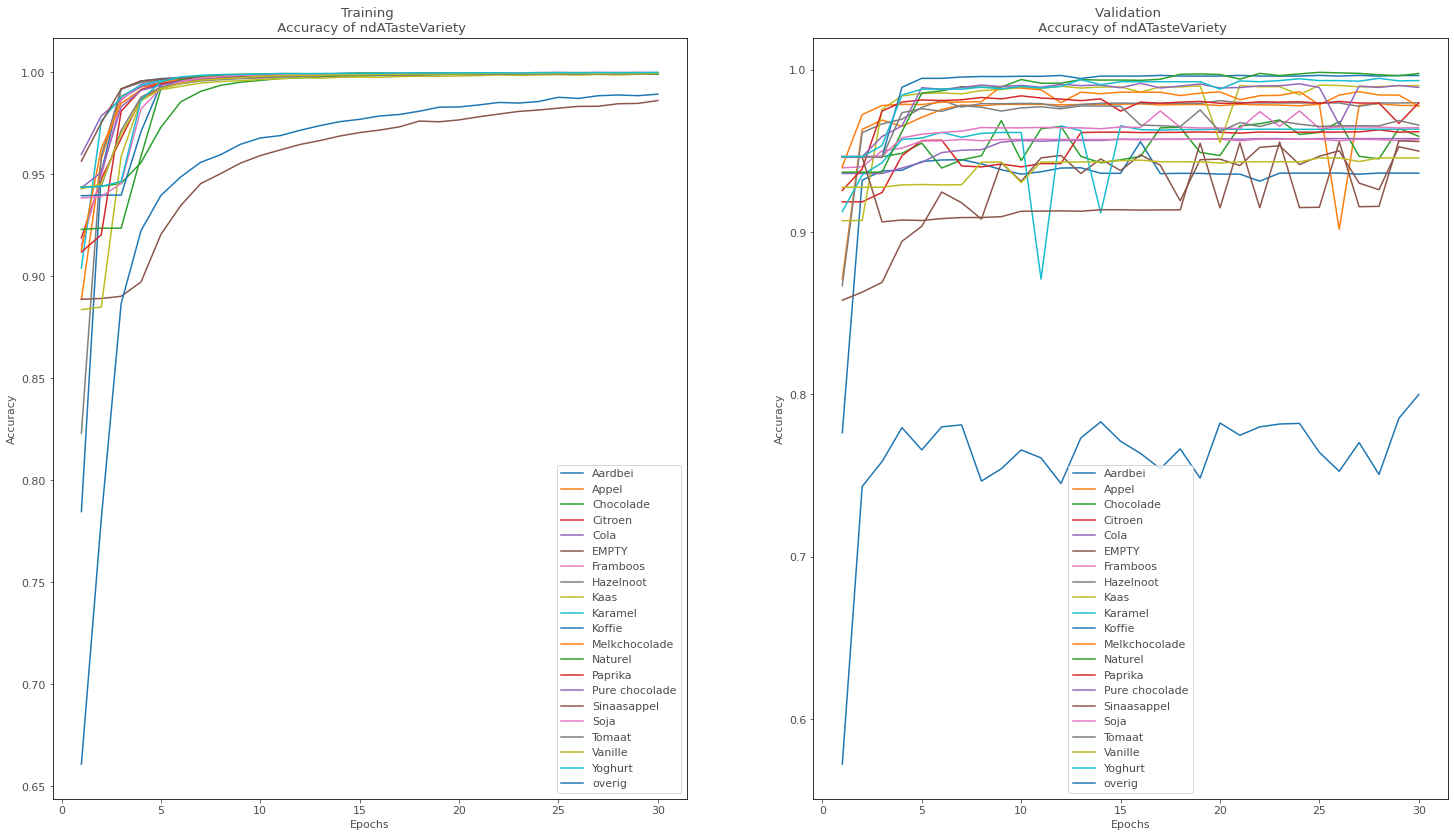

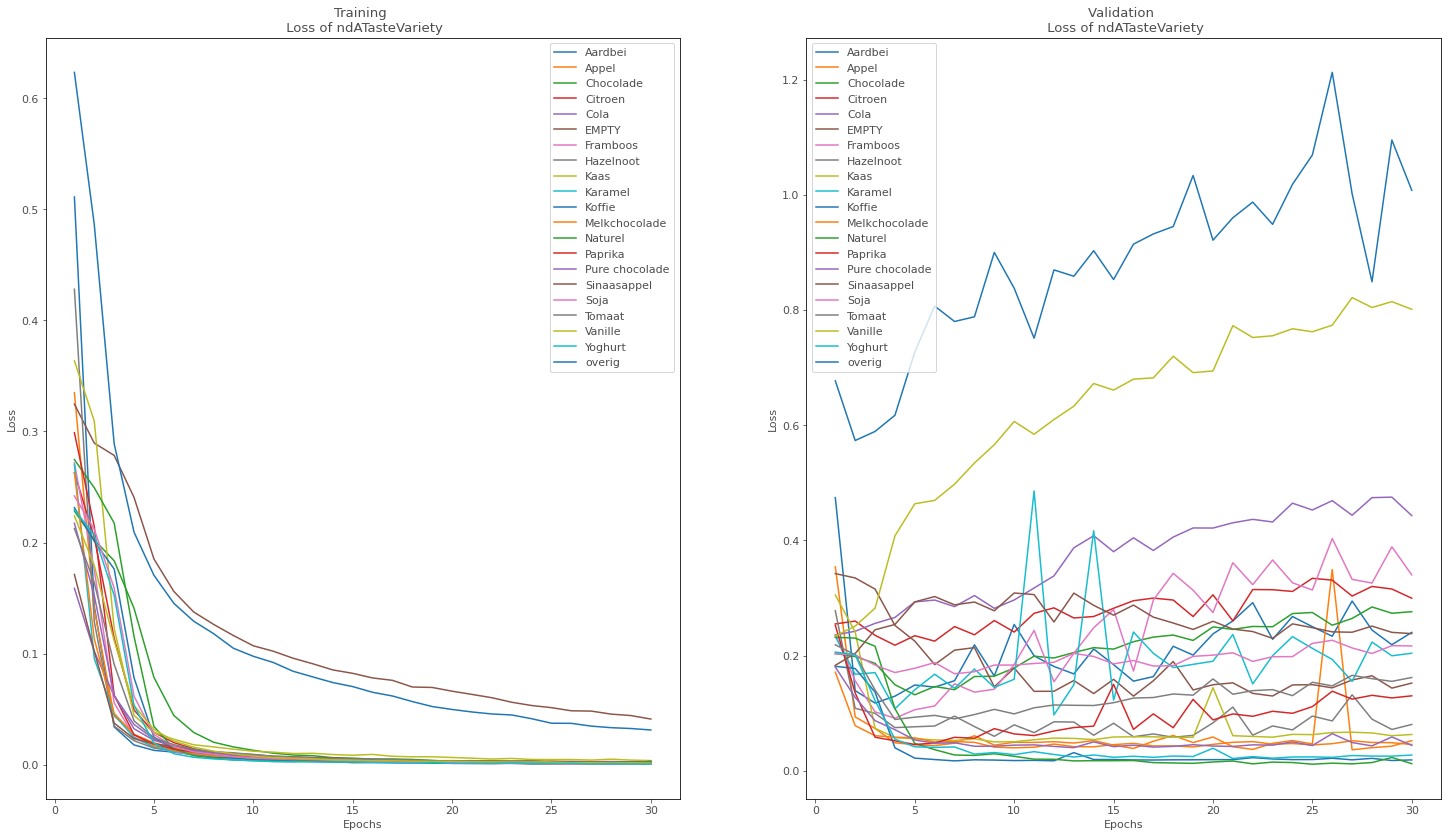

In [0]:
# Plot statistieken van de training fase
if multi_label_flag == True:
    plot_multiple_training(train_accuracies, val_accuracies, class_names, ATTRIBUUT, type_='Accuracy')
    plot_multiple_training(train_loss, val_loss, class_names, ATTRIBUUT, type_='Loss')
else:
    plot_single_label_training(model, model_history, Xtest_num, Xtest_text, ytest, ATTRIBUUT, DF_merged)
    